<a href="https://colab.research.google.com/github/Sk-Shakeel07/Deep-Learning-repo/blob/main/lab_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-5: IMAGE CLASSIFICATION USING CNN MODELS WITH TRANSFER LEARNING
## Name: SK SHAKEEL AKHTAR
## Reg. No.: 2341001063
## Section:23412C3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


from tensorflow.keras import layers, models, datasets, applications
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

5.6.1. Setup and Data Preparation
* Choose the CIFAR-1O dataset using keras.datasets.cifar10
* or a custom dataset with labeled images.
* Load and preprocess the dataset:
  * Resize images to the input size expected by the pre-trained model.
  * Display some of the images with their class labels.
 * Normalize pixel values (scale them between O and 1).
* Split the dataset into training and validation sets.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


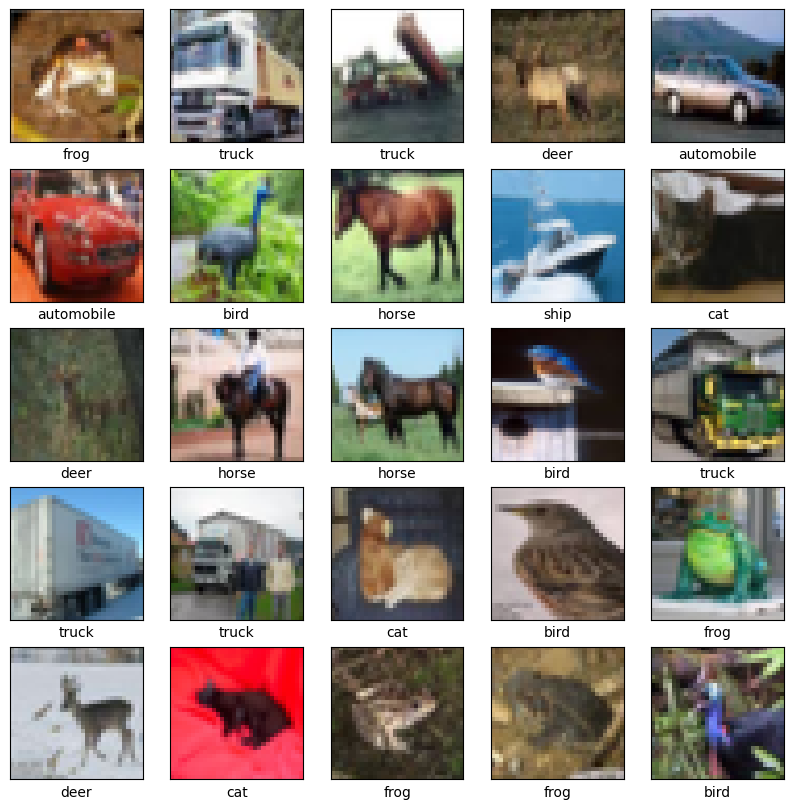

In [2]:


# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions
#img_rows, img_cols = 32, 32
#input_shape = (img_rows, img_cols, 3)

# Resize images (if needed) - CIFAR-10 images are already 32x32
#x_train = tf.image.resize(x_train, [img_rows, img_cols]).numpy()
#x_test = tf.image.resize(x_test, [img_rows, img_cols]).numpy()

# Display some images with their class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Split the dataset into training and validation sets
val_split = 0.2
val_samples = int(len(x_train) * val_split)
x_val = x_train[:val_samples]
y_val = y_train[:val_samples]
x_train = x_train[val_samples:]
y_train = y_train[val_samples:]


# 5.6.2: Transfer Learning Using Pre-trained CNN Models
* Select the following pre-trained CNN models one by one.
 * GoogleNet
 * ResNet50
 * VGG16  
 * MobileNetV2
 *  Xception
* Freeze the base model layers to retain pre-trained weights.
* Add a custom classification head:
 * Global Average Pooling (GAP) or Flatten layer.
 * Fully connected (Dense) layer(s).
 * Output layer with the number of classes (use softmax activation).
* Display the architecture of your model.

In [3]:
# 5.6.2: Transfer Learning Using Pre-trained CNN Models
img_size = 75
pre_trained_models = {
    "GoogleNet": applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3)),
    "ResNet50": applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3)),
    "VGG16": applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3)),
    "MobileNetV2": applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3)),
    "Xception": applications.Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
}

results = {}

for model_name, base_model in pre_trained_models.items():
    # Freeze the base model
    base_model.trainable = False

    # Add custom classification head
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    # Display the model architecture
    print(f"\nModel Architecture: {model_name}")
    model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-3-247b162bbbbe>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  "MobileNetV2": applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3)),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Model Architecture: GoogleNet


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 1, 1, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,329,898 (85.18 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)


Model Architecture: ResNet50


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 3, 3, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)


Model Architecture: VGG16


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)


Model Architecture: MobileNetV2


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 3, 3, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,588,490 (9.87 MB)

 Trainable params: 330,506 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)


Model Architecture: Xception


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 3, 3, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,388,594 (81.59 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

# 5.6.3: Training the Model
* Compile the models with appropriate configurations:
 * Loss function: categorical_crossentropy for multi-class classification.
 * Optimizer:  adam.
 * Metric: accuracy.  
* Train the model on the training set for a defined number of epochs using batch size 32.
* Use callbacks to stop the training incase the model performance does not improve.
* Validate the model on the validation set.

In [4]:
# 5.6.3: Training the Model

# Resize training and validation data to match the input shape of the pre-trained models
img_size = 75  # Assuming this is the input size for your pre-trained models
x_train_new = tf.image.resize(x_train, [img_size, img_size]).numpy()
x_val_new = tf.image.resize(x_val, [img_size, img_size]).numpy()

# One-hot encode the labels if they are not already
y_train_new = to_categorical(y_train, num_classes=10)
y_val_new = to_categorical(y_val, num_classes=10)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train_new, y_train_new,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_val_new, y_val_new),
                    callbacks=[early_stopping])

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6449 - loss: 1.0746 - val_accuracy: 0.7251 - val_loss: 0.7871
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 25ms/step - accuracy: 0.7556 - loss: 0.6980 - val_accuracy: 0.7358 - val_loss: 0.7805
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7947 - loss: 0.5876 - val_accuracy: 0.7394 - val_loss: 0.7855
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.8300 - loss: 0.4725 - val_accuracy: 0.7374 - val_loss: 0.7984
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8649 - loss: 0.3856 - val_accuracy: 0.7404 - val_loss: 0.8172


#5.6.4: Evaluation and Results
* Plot training and validation accuracy and loss over epochs for all the models.
* Evaluate the accuracy and loss on the test set for all the models.
* Generate the classification report for all the models.
* Use all trained models to predict a few sample images and display the results with their actual and
predicted labels.

In [5]:
#5.4
results = {}

for model_name, base_model in pre_trained_models.items():
    # ... (model creation and training) ...

    # Store results for the current model inside the loop
    results[model_name] = {
        "history": history,
        "model": model
    }

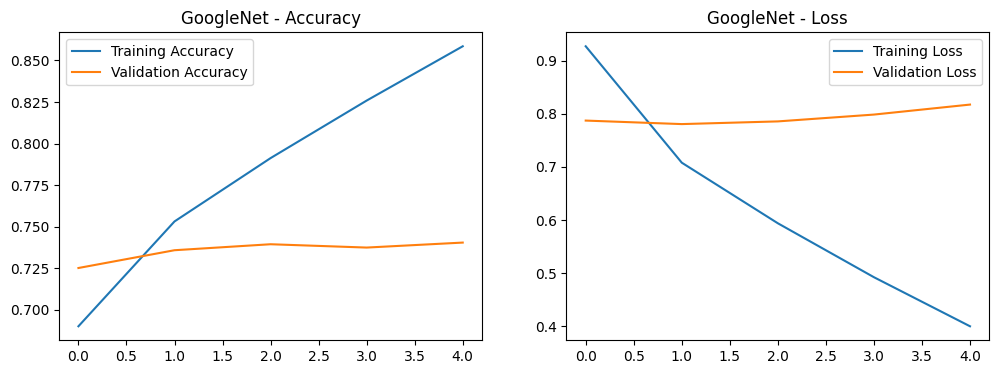

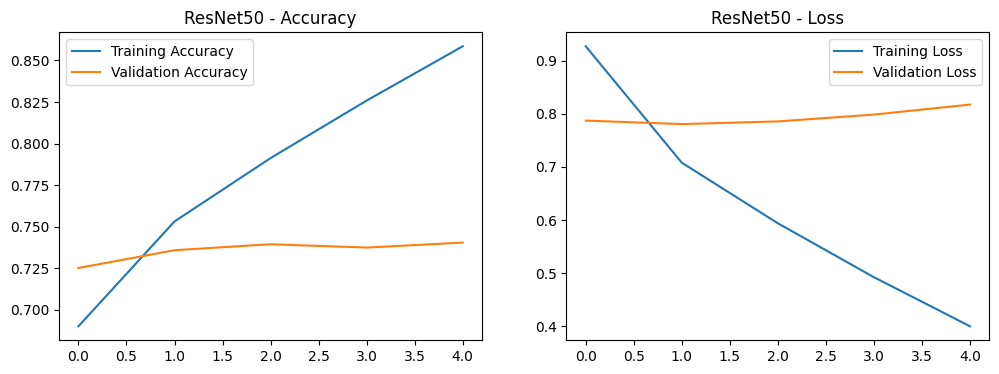

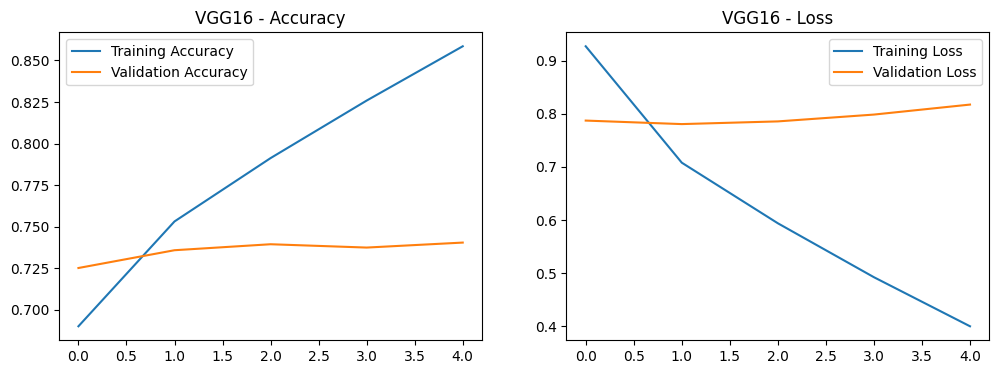

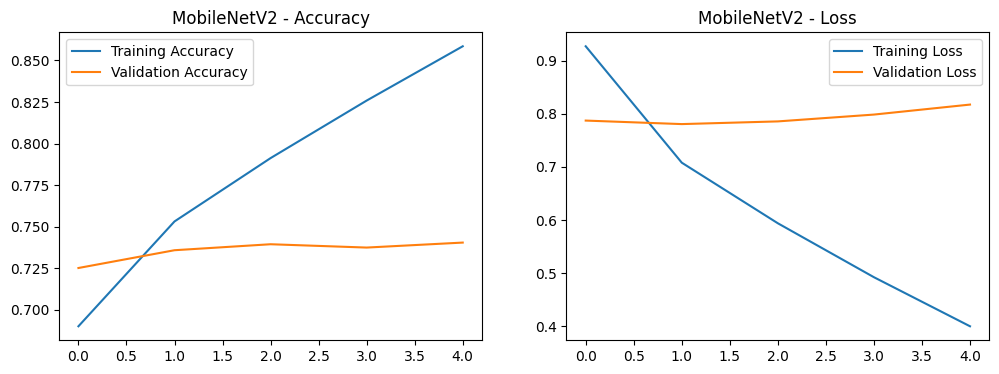

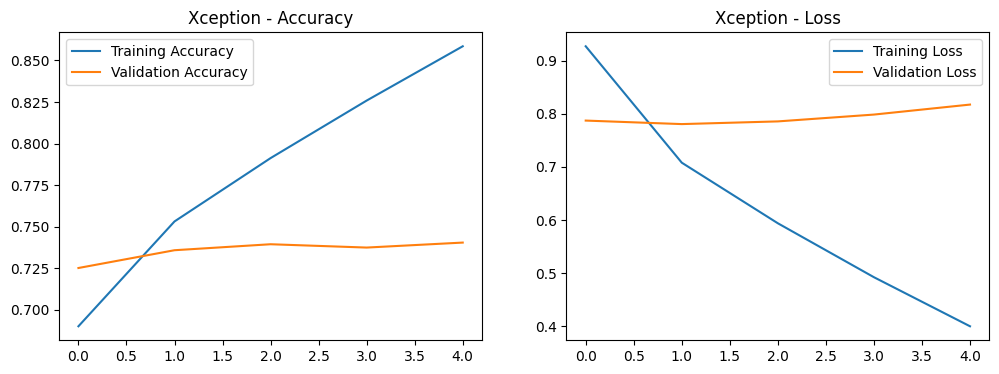

In [6]:
# Plot training and validation accuracy and loss
for model_name, result in results.items():
    history = result["history"]
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title(f'{model_name} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title(f'{model_name} - Loss')
    plt.show()

In [7]:
# Normalize test data (missing step in original code)
x_test_normalized = x_test.astype('float32') / 255
# Resize test data before using it for prediction
img_size = 75  # Assuming this is the input size for your pre-trained models
x_test_resized = tf.image.resize(x_test, [img_size, img_size]).numpy()
#Convert y_test to categorical
y_test_categorical = to_categorical(y_test, num_classes=10)

In [8]:
# Continue with the evaluation and results section
for model_name, result in results.items():
    model = result["model"]
    # Use resized test data for prediction
    y_pred = model.predict(x_test_resized)  # Now using the resized data
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test_categorical, axis=1)  # Now using categorical y_test

    # Use resized test data for evaluation
    loss, accuracy = model.evaluate(x_test_resized, y_test_categorical)  # Now using categorical y_test
    print(f"\n{model_name} - Test Loss: {loss}, Test Accuracy: {accuracy}")

    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_true, y_pred_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7221 - loss: 0.8833

GoogleNet - Test Loss: 0.8552818298339844, Test Accuracy: 0.7300999760627747

GoogleNet - Classification Report:
              precision    recall  f1-score   support

    airplane       0.78      0.73      0.76      1000
  automobile       0.81      0.85      0.83      1000
        bird       0.68      0.66      0.67      1000
         cat       0.60      0.58      0.59      1000
        deer       0.63      0.67      0.65      1000
         dog       0.66      0.69      0.68      1000
        frog       0.72      0.74      0.73      1000
       horse       0.82      0.74      0.78      1000
        ship       0.78      0.85      0.82      1000
       truck       0.85      0.76      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

313/313 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


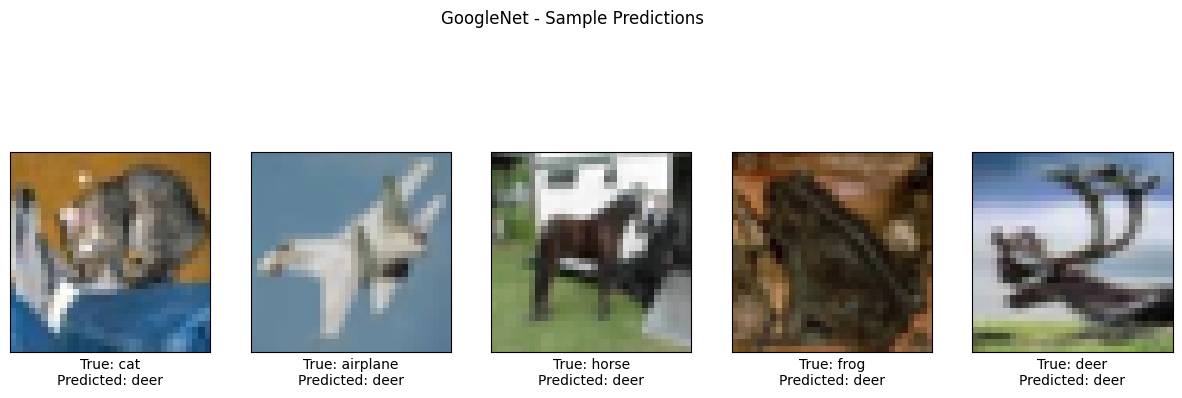

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


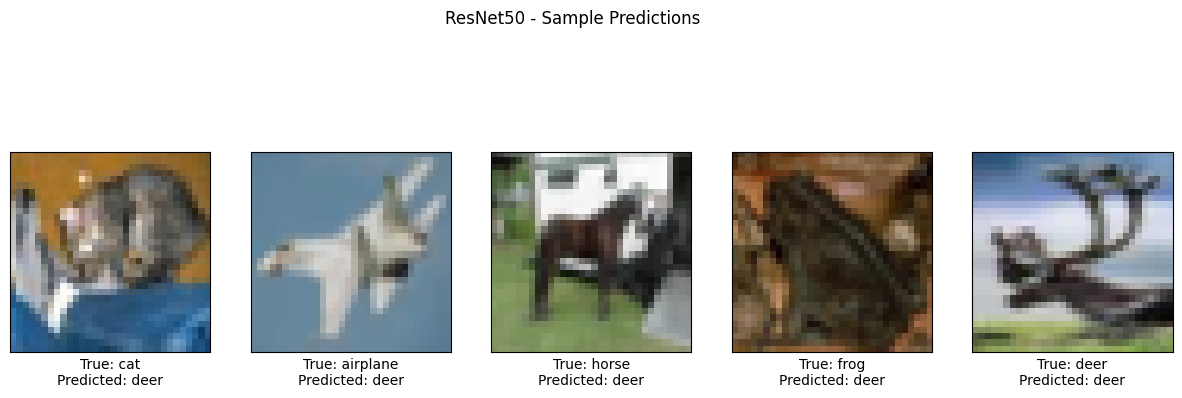

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


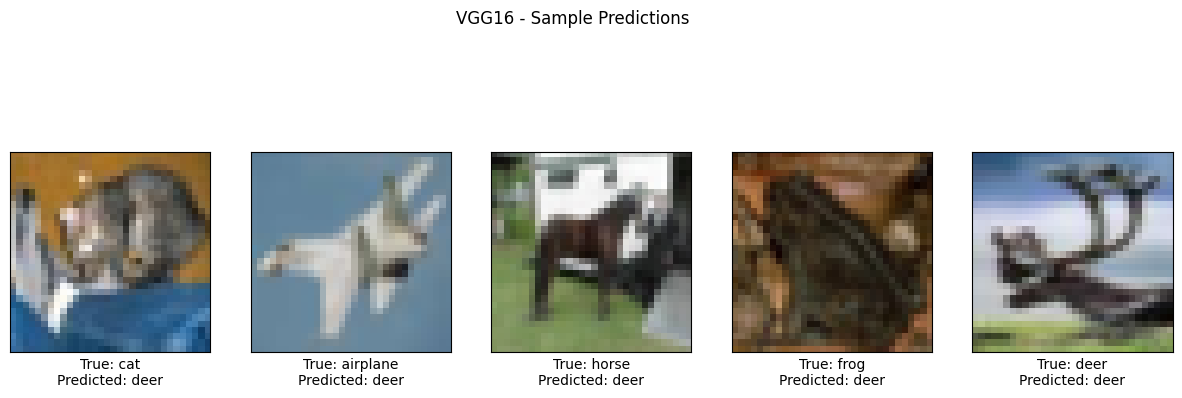

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


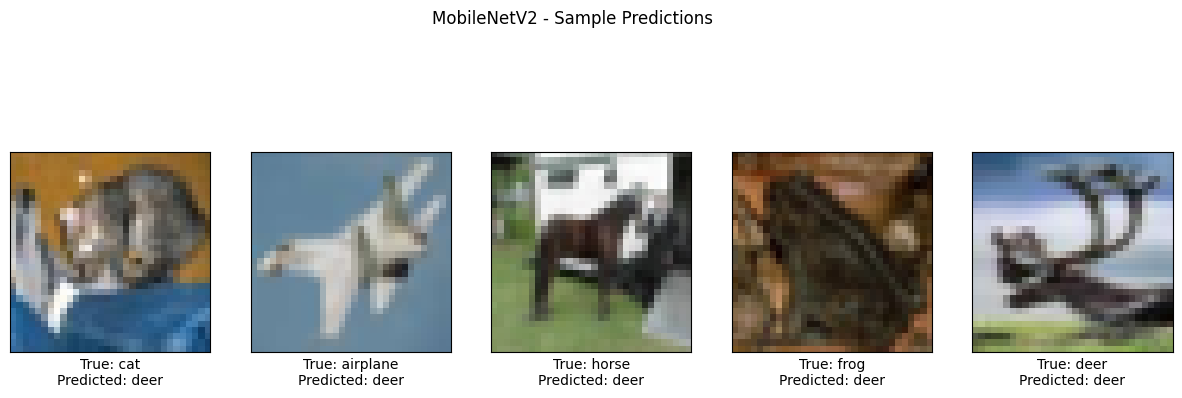

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


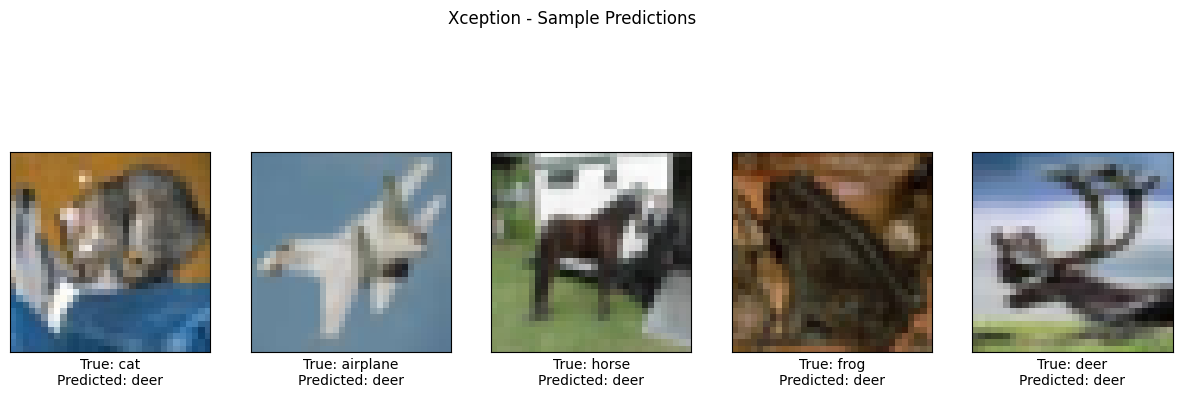

In [9]:
# Predict on sample images
sample_indices = [0, 10, 20, 30, 40]
for model_name, result in results.items():
    model = result["model"]
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, len(sample_indices), i + 1)
        plt.imshow(x_test[idx])
        plt.xticks([])
        plt.yticks([])
        true_label = class_names[y_test[idx][0]]
        prediction = model.predict(np.expand_dims(x_test_normalized[idx], axis=0))
        predicted_label = class_names[np.argmax(prediction)]
        plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.suptitle(f"{model_name} - Sample Predictions")
    plt.show()